In [ ]:
import tensorflow as tf
tf.__version__

In [ ]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

In [ ]:
a = tf.constant([[1.0,2.0,3.0],[4.0,5.0,6.0]])
b = tf.constant([[1.0,2.0],[3.0,4.0],[5.0,6.0]])
c = tf.matmul(a,b)

print(c)

In [ ]:
# 40페이지

In [ ]:
import tensorflow as tf
import sys

hello = tf.constant("Hello World") # 상수
print(hello)
print(hello.numpy()) # 바이트 배열
print(hello.numpy().decode('utf-8')) # 바이트 배열을 스트링으로

a = tf.constant(10)
b = tf.constant(32)
c = tf.add(a,b) # 텐서 연산은 함수를 쓰는 것이 원칙
print(c.numpy())
print([a.numpy(), b.numpy(), c.numpy()])

In [ ]:
node1 = tf.constant(3.0)
node2 = tf.constant(4.0)
node3 = tf.add(node1,node2)
print(node3.numpy())

In [ ]:
def output(a,b):
    return tf.multiply(a,b)

print(output(3.0, 5.0).numpy())
print(output(0.0, 6.0).numpy())
print(output([2.0,3.1,7.4],[6.0,2.5,3.1]).numpy())

In [ ]:
# 텐서플로의 변수 선언

W = tf.Variable([0.3],dtype=tf.float32)
b = tf.Variable([-0.3],dtype=tf.float32)

def linear_model(x):
    return tf.multiply(W,tf.add(x,b))

x = [1.,2.,3.,4.]
linear_model(x).numpy()

In [ ]:
import numpy as np

X = np.array([[1,2,3],[4,5,6]])
print('X\n',X)

W = np.array([[np.random.randint(10) for col in range(2)] for row in range(3)])
print('W\n',W)

b = np.array([[np.random.randint(10) for col in range(2)] for row in range(1)])
print('b\n',b)

def expr(X):
    return tf.matmul(X,W) # 행렬 곱셈 함수 matmul()

print('Result\n',expr(X).numpy())

In [ ]:
# 구구단 계산

import tensorflow as tf

def calc(left,right):
    return tf.multiply(left,right)

def gugu(dan):
    for i in range(1,10):
        result = calc(dan, i)
        print("{0} x {1} = {2:2}".format(dan,i,result))

gugu(7)

In [ ]:
# 잠시 단순회귀분석.ipynb로 ~~~

In [ ]:
# 58페이지로~~!

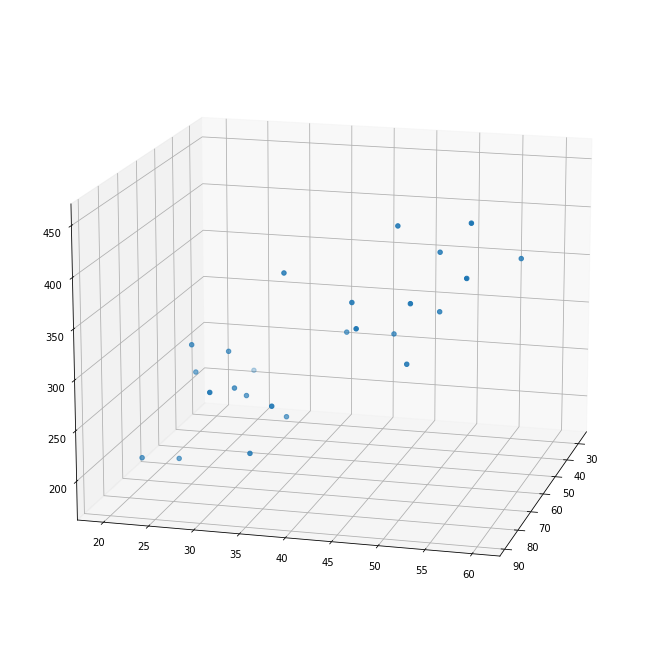

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.keras
from tensorflow.keras.models import Sequential
from keras.layers.core import Dense
from tensorflow.keras.optimizers import RMSprop
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(7)
data = np.genfromtxt("/Users/ian/Desktop/Study/data/regression/x09.txt", skip_header=36)

xdata = np.array(data[:,2],dtype=np.float32)
ydata = np.array(data[:,3],dtype=np.float32)
zdata = np.array(data[:,4],dtype=np.float32)
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(xdata,ydata,zdata)
ax.view_init(15,15)
plt.show()

In [4]:
x_data = np.array(data[:,2:4],dtype=np.float32)
y_data = np.array(data[:,4],dtype=np.float32)
model = Sequential()
model.add(Dense(1,input_shape=(2,))) # 출력노드 1, 입력노드 2

rmsprop = RMSprop(learning_rate=0.01)
model.compile(loss='mse', optimizer=rmsprop)

In [5]:
hist = model.fit(x_data,y_data,epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 329ms/step - loss: 114281.0625
Epoch 2/500
1/1 [==============================] - 0s 3ms/step - loss: 111969.8438
Epoch 3/500
1/1 [==============================] - 0s 3ms/step - loss: 110316.7031
Epoch 4/500
1/1 [==============================] - 0s 3ms/step - loss: 108946.4219
Epoch 5/500
1/1 [==============================] - 0s 3ms/step - loss: 107740.2109
Epoch 6/500
1/1 [==============================] - 0s 5ms/step - loss: 106642.9922
Epoch 7/500
1/1 [==============================] - 0s 4ms/step - loss: 105624.1484
Epoch 8/500
1/1 [==============================] - 0s 3ms/step - loss: 104664.6172
Epoch 9/500
1/1 [==============================] - 0s 3ms/step - loss: 103751.7031
Epoch 10/500
1/1 [==============================] - 0s 7ms/step - loss: 102876.3672
Epoch 11/500
1/1 [==============================] - 0s 5ms/step - loss: 102032.0469
Epoch 12/500
1/1 [==============================] - 0s 3ms/step - loss: 101213.7266

In [6]:
print(hist.history.keys())

dict_keys(['loss'])


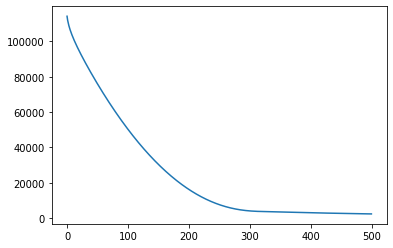

In [7]:
plt.plot(hist.history["loss"])
plt.show()

In [8]:
model.predict(np.array([100,40]).reshape(1,2))

array([[380.60168]], dtype=float32)

In [9]:
w, b = model.get_weights() # 학습을 하면서 얻어낸 최적의 파라미터. 아까 인풋 노드가 2개였으니 여기도 두 개의 가중치가 필요

In [10]:
x = np.linspace(20,100,50).reshape(50,1)
y = np.linspace(10,70,50).reshape(50,1)
x2 = np.concatenate((x,y),axis=1)
z = np.matmul(x2,w)+b

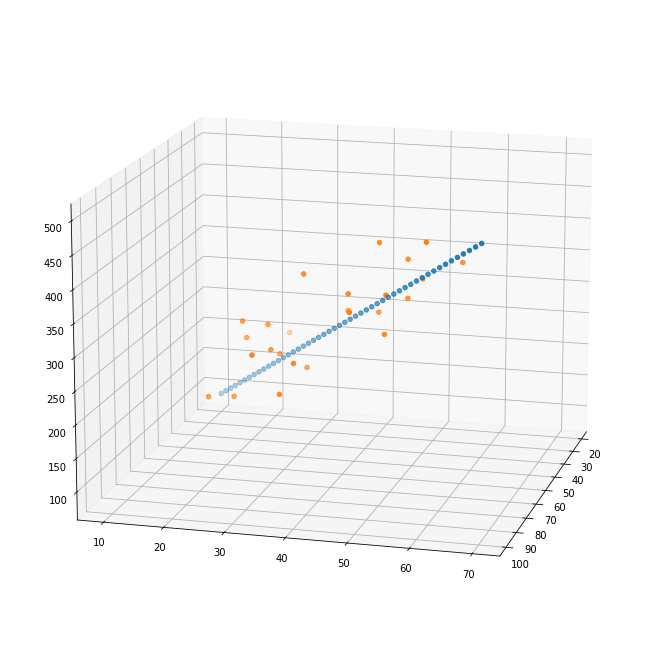

In [11]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(x,y,z)
ax.scatter(xdata,ydata,zdata)
ax.view_init(15,15)
plt.show()

In [ ]:
# 보스턴 주택가격 keras 기반 회귀분석

In [2]:
from tensorflow.python import keras
from tensorflow.keras.datasets import boston_housing

(X_train, y_train),(X_test,y_test) = boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


<AxesSubplot:>

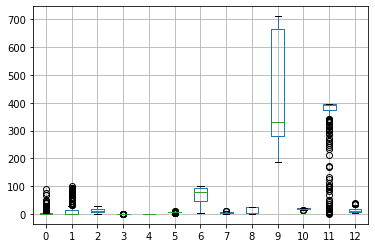

In [3]:
import pandas as pd

pd.DataFrame(X_train).boxplot()

<AxesSubplot:>

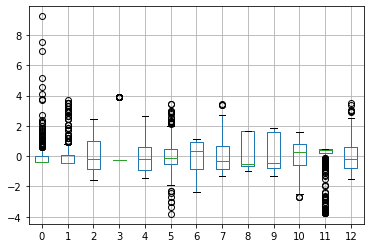

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

pd.DataFrame(X_train_scaled).boxplot()

In [23]:
from tensorflow.keras import models
from tensorflow.keras import layers

def build_model():
    model = models.Sequential() # 신경망 모델
    model.add(layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],))) # 첫 번째 은닉층. 아웃풋 노드 64개, 활성화함수는 relu, 인풋 노드는 1차원
    model.add(layers.Dense(64, activation='relu')) # 두 번째 은닉층
    model.add(layers.Dense(1)) # 출력층. 출력 노드 수 1개. 회귀분석은 출력 노드 1개면 됨
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae']) # 평가기준metrics은 평균절대오차mae
    return model

model = build_model()
hist = model.fit(X_train_scaled, y_train, epochs=50, batch_size=1, verbose=1)

Epoch 1/50
404/404 [==============================] - 1s 1ms/step - loss: 149.9385 - mae: 8.6526
Epoch 2/50
404/404 [==============================] - 0s 1ms/step - loss: 21.5077 - mae: 2.9997: 0s - loss: 10.
Epoch 3/50
404/404 [==============================] - 0s 1ms/step - loss: 17.4123 - mae: 2.7313
Epoch 4/50
404/404 [==============================] - 0s 1ms/step - loss: 13.9032 - mae: 2.5127
Epoch 5/50
404/404 [==============================] - 0s 1ms/step - loss: 13.4302 - mae: 2.4363
Epoch 6/50
404/404 [==============================] - 0s 1ms/step - loss: 12.3774 - mae: 2.3825
Epoch 7/50
404/404 [==============================] - 0s 1ms/step - loss: 11.6144 - mae: 2.2818
Epoch 8/50
404/404 [==============================] - 0s 1ms/step - loss: 10.9953 - mae: 2.2617
Epoch 9/50
404/404 [==============================] - 1s 2ms/step - loss: 10.5909 - mae: 2.1676
Epoch 10/50
404/404 [==============================] - 0s 1ms/step - loss: 10.2840 - mae: 2.2238
Epoch 11/50
404/404 [=

In [24]:
mse, mae = model.evaluate(X_test_scaled, y_test, verbose=1)
print(mse)
print(mae)

4/4 [==============================] - 0s 2ms/step - loss: 13.9414 - mae: 2.3551
13.941442489624023
2.355053424835205


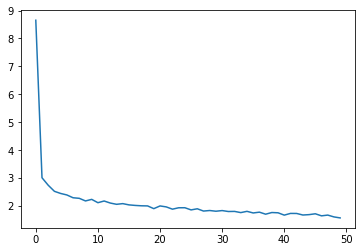

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(hist.history["mae"])
plt.show()

In [26]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 64)                896       
                                                                 
 dense_16 (Dense)            (None, 64)                4160      
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________
